**Hierarchical Clustering & DBSCAN**

**1. Introduction to Hierarchical Clustering**
    
Hierarchical Clustering is an **unsupervised learning** method that builds clusters step-by-step by either:
    
- **Agglomerative**: Bottom-Up approach — start with each data point as its own cluster and merge them.
- **Divisive**: Top-Down approach — start with one cluster and split into smaller clusters.

In this notebook, we’ll focus on **Agglomerative Hierarchical Clustering**.

**2. Agglomerative Clustering – Steps**
    
Example of merging in bottom-up approach:
    
1. Start with each customer as its own cluster.
2. Merge the closest clusters step-by-step based on distance.
3. Continue until the desired number of clusters is reached.

**We will use:**
    
- **Dendrogram** to decide the optimal number of clusters.
- **AgglomerativeClustering** from `sklearn` to fit and predict.


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Load Dataset
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Mall_Customers.csv")

In [3]:
# Select Features (Annual Income & Spending Score)
X = df.iloc[:, [3, 4]].values

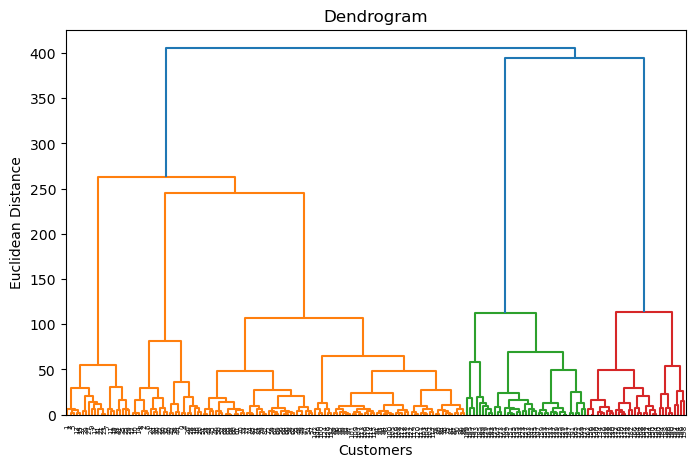

In [4]:
# Plot Dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

**Dendrogram (Hierarchical Clustering – Agglomerative)**

- **Purpose**: The dendrogram shows how data points (customers) are merged step-by-step in the **Agglomerative Hierarchical Clustering** process.
- **How to Read**:
  - The **x-axis** represents individual customers.
  - The **y-axis** shows the **Euclidean distance** at which clusters are merged.
  - Start from the bottom: each point is its own cluster.
  - As we go up, clusters merge based on similarity until all points are in one cluster.
- **Key Insight**:  
  By drawing a horizontal line at a chosen height and counting the vertical cuts, we can determine the **optimal number of clusters**.  
  In this case, the cut suggests **5 clusters**.

In [5]:
# Fitting Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

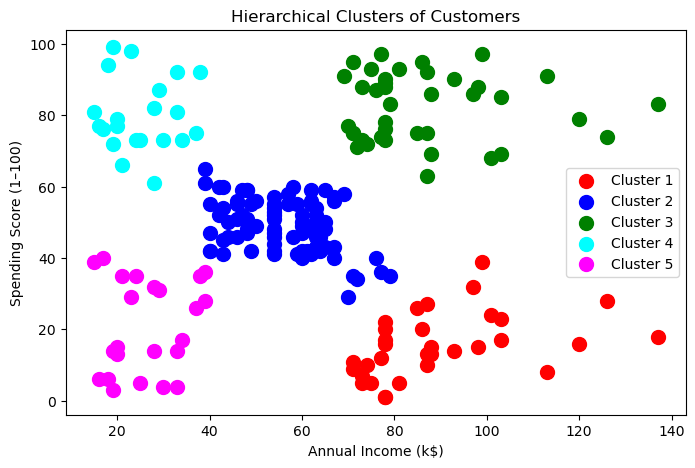

In [7]:
# Plotting Clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Hierarchical Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()

**Hierarchical Clusters of Customers**
    
- **Purpose**: Shows the customer segments formed using **Agglomerative Clustering** with `n_clusters=5`.
- **Axes**:
  - **X-axis**: Annual Income (k$)
  - **Y-axis**: Spending Score (1–100)
- **Cluster Colors**:
  - **Red, Blue, Green, Cyan, Magenta** each represent a different customer group.
- **Key Insight**:
  - Customers in the same color cluster have **similar income and spending patterns**.
  - Example:  
    - Magenta → Low income, medium spending.  
    - Green → High income, medium-high spending.  
    - Red → Medium-high income, low spending.

In [8]:
# Adding Cluster Labels to Dataset
df['Cluster_HC'] = y_hc
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_HC
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


**3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN is another clustering method that:

- Groups together points **close to each other** (high density regions).
- Marks points in low-density regions as **outliers**.
- Works well for irregularly shaped clusters and noisy datasets.

**Key Terms:**
    
- **Core Point**: Has at least `min_samples` points within `eps` radius.
- **Border Point**: Lies within `eps` of a core point but has fewer than `min_samples` neighbors.
- **Outlier**: Neither core nor border point.

In [9]:
from sklearn.cluster import DBSCAN

# Fitting DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

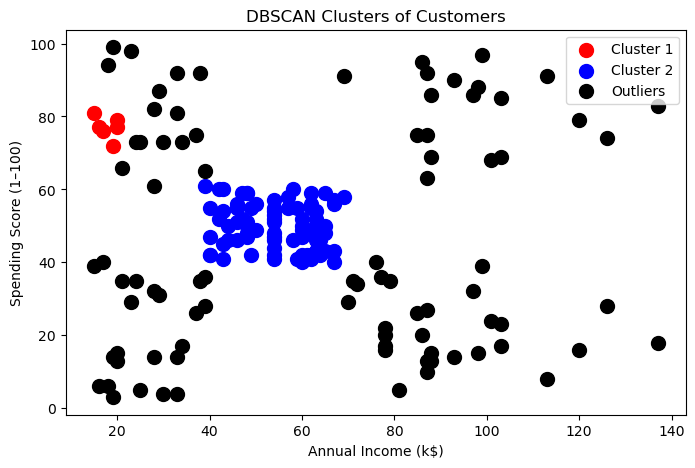

In [10]:

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s=100, c='black', label='Outliers')

plt.title('DBSCAN Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()

**DBSCAN Clusters of Customers**

- **Purpose**: Shows clusters formed using **Density-Based Spatial Clustering (DBSCAN)**.
- **Key Terms**:
  - **Cluster 1 (Red)** and **Cluster 2 (Blue)** are dense regions where customers are closely packed.
  - **Black points** are **outliers** — customers who don’t belong to any dense group.
- **Axes**:
  - **X-axis**: Annual Income (k$)
  - **Y-axis**: Spending Score (1–100)
- **Key Insight**:
  - DBSCAN detects **irregularly shaped clusters** and identifies noise points.
  - Useful for datasets where clusters are not clearly separated or contain noise.


In [11]:
# Adding DBSCAN cluster results to DataFrame
df['Cluster_DBSCAN'] = y_dbscan
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_HC,Cluster_DBSCAN
0,1,Male,19,15,39,4,-1
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,4,-1
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,4,-1


**4. Summary**

- **Hierarchical Clustering**:  
   Visualized clusters using a dendrogram.  
   Applied Agglomerative Clustering to group customers into 5 clusters.  

- **DBSCAN**:  
   Detected clusters based on density.  
   Identified outliers in customer data.  

**Next Step:** Compare clustering results from K-Means, Hierarchical, and DBSCAN for customer segmentation insights.



**5. Comparison of Clustering Results**

We applied **three clustering techniques** on the same dataset (`Annual Income` & `Spending Score`):

| Method                  | Number of Clusters | Handles Noise? | Shape of Clusters | Needs K upfront? |
|-------------------------|--------------------|----------------|-------------------|------------------|
| **K-Means**             | Fixed (K=5)        |  No           | Mostly spherical  |  Yes            |
| **Hierarchical**        | Fixed (K=5)        |  No           | Can be any shape  |  Yes (after dendrogram) |
| **DBSCAN**              | Determined by data |  Yes          | Arbitrary shapes  |  No             |

**Visual Insights:**
    
1. **K-Means**:
    
   - Creates equal-sized, spherical clusters.
   - Works well for well-separated groups.
   - Struggles with noise and non-spherical shapes.

2. **Hierarchical (Agglomerative)**:

   - Produces similar results to K-Means for this dataset.
   - Dendrogram helps in deciding the optimal number of clusters.
   - Can be computationally expensive for large datasets.

3. **DBSCAN**:

   - Automatically detects the number of clusters.
   - Identifies **outliers** (black points in the plot).
   - Works well for arbitrary-shaped clusters.
   - Sensitive to `eps` and `min_samples` parameters.



**6. Dataset Findings – Mall_Customers.csv**

From the clustering results:

**K-Means & Hierarchical Clustering:**
    
- **Cluster 1 (Low Income, Low Spending)** – Budget-conscious customers, possibly not target for luxury offers.
- **Cluster 2 (High Income, High Spending)** – Premium customers, ideal for VIP loyalty programs.
- **Cluster 3 (Medium Income, Medium Spending)** – Average customers, can be influenced with promotions.
- **Cluster 4 (Low Income, High Spending)** – Value shoppers, respond well to discounts & sales.
- **Cluster 5 (High Income, Low Spending)** – Potential big spenders if targeted correctly.

**DBSCAN:**
                                                                
- Detected **two main customer groups** and a large number of **outliers**.
- Outliers represent customers with unusual income–spending patterns (e.g., very high income but low spending, or very low income but high spending).
- Useful for detecting anomalies or special customer segments for analysis.



**Conclusion**

- **If clusters are well-separated & number of clusters is known** → Use **K-Means** for speed and simplicity.
- **If number of clusters is unknown** but data is small-to-medium size → Use **Hierarchical Clustering** with a dendrogram for visual inspection.
- **If data contains noise or irregular shapes** → Use **DBSCAN** for better flexibility and outlier detection.

**Final Takeaway:**  
    
For **Mall Customers Segmentation**:

- **K-Means** and **Hierarchical** both suggest **5 customer groups** with clear marketing opportunities.
- **DBSCAN** is more strict, grouping dense areas while labeling unusual customers as outliers — helpful for fraud detection, anomaly spotting, or niche marketing.
- Combining these methods can give a **full 360° view** of customer behavior.
